In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer'
metadata = pd.read_csv(f'{main_dir}/metadata_complete.csv', index_col=0)

alignment_dir = os.path.join(main_dir, 'alignment_46_grid_0')

In [3]:
main_alignment = pd.read_csv(f'{alignment_dir}/alignment_df.csv', index_col=0)
main_alignment['623'] = main_alignment.index.to_list()

In [4]:
def load_raw_data(num, alignment_df):
    peaks_intensity_file = f'{main_dir}/{num}_final_peaks_intensity_max.csv'
    peak_info_file = f'{main_dir}/{num}_final_peaks_peak_info.csv'

    peaks_intensity = pd.read_csv(peaks_intensity_file, index_col=0)
    peak_info = pd.read_csv(peak_info_file, index_col=0)

    selected_peaks = alignment_df[f'{num}'].copy()
    selected_peaks.dropna(inplace=True)
    peak_info = peak_info.loc[selected_peaks.values].copy()
    peaks_intensity = peaks_intensity.loc[selected_peaks.values].copy()
    
    peak_info.index = selected_peaks.index.tolist()
    peaks_intensity.index = selected_peaks.index.tolist()

    peak_info['exists'] = 1
    return peaks_intensity, peak_info

In [5]:
int1, info1 = load_raw_data(623, main_alignment)
int2, info2 = load_raw_data(624, main_alignment)
int3, info3 = load_raw_data(625, main_alignment)
int4, info4 = load_raw_data(626, main_alignment)

In [17]:
(~main_alignment.isna()).sum(axis=0)

625    2165
626    2147
624    2051
623    2541
dtype: int64

## Combine the Peak Info

In [6]:
combined_info = info1.add(info2, fill_value=0).add(info3, fill_value=0).add(info4, fill_value=0)


In [7]:
combined_info = combined_info.divide(combined_info['exists'], axis=0)

In [8]:
combined_info

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,auto_corr,cross_corr,freq,chunk_idx,log2snr,exists
FT10,89.730431,89.729266,89.732674,28.226807,18.932653,74.787526,0.421768,0.765262,0.876929,0.0,4.971036,1.0
FT1002,211.144026,211.143032,211.148453,28.972838,15.992089,73.460370,0.537233,0.790533,0.764075,25.0,3.863004,1.0
FT1006,213.148411,213.147324,213.149376,26.323709,2.870096,71.310551,0.728431,0.759366,0.914612,25.0,3.423469,1.0
FT1007,212.164391,212.163551,212.165321,26.966733,4.443415,68.617923,0.620896,0.735031,0.578125,25.0,4.357320,1.0
FT1009,211.132748,211.131695,211.133690,26.204132,2.561791,67.059812,0.778920,0.818691,0.988712,25.0,4.145684,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
FT988,213.112071,213.111170,213.112874,25.873376,5.286582,61.537962,0.481744,0.684889,0.538792,25.0,2.321221,1.0
FT989,213.102028,213.095615,213.103443,25.709620,14.863179,49.759902,0.642535,0.842668,0.358019,25.0,4.435292,1.0
FT99,102.074416,102.073551,102.074848,87.288216,73.563593,110.543191,0.537054,0.732465,0.532880,3.0,2.717472,1.0
FT991,212.019650,212.018894,212.020454,27.464814,21.545145,67.919851,0.571000,0.821159,0.383501,25.0,2.858658,1.0


## Combine the peak intensity

In [9]:
combined_int = int1.join(int2,how='outer').join(int3,how='outer').join(int4,how='outer')

In [10]:
# update the peak frequency
freq = 1- (combined_int.isna().sum(axis=1)/combined_int.shape[1])
combined_info['freq'] = freq

In [11]:
combined_info

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,auto_corr,cross_corr,freq,chunk_idx,log2snr,exists
FT10,89.730431,89.729266,89.732674,28.226807,18.932653,74.787526,0.421768,0.765262,0.657887,0.0,4.971036,1.0
FT1002,211.144026,211.143032,211.148453,28.972838,15.992089,73.460370,0.537233,0.790533,0.764110,25.0,3.863004,1.0
FT1006,213.148411,213.147324,213.149376,26.323709,2.870096,71.310551,0.728431,0.759366,0.914616,25.0,3.423469,1.0
FT1007,212.164391,212.163551,212.165321,26.966733,4.443415,68.617923,0.620896,0.735031,0.289146,25.0,4.357320,1.0
FT1009,211.132748,211.131695,211.133690,26.204132,2.561791,67.059812,0.778920,0.818691,0.988712,25.0,4.145684,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
FT988,213.112071,213.111170,213.112874,25.873376,5.286582,61.537962,0.481744,0.684889,0.404052,25.0,2.321221,1.0
FT989,213.102028,213.095615,213.103443,25.709620,14.863179,49.759902,0.642535,0.842668,0.358032,25.0,4.435292,1.0
FT99,102.074416,102.073551,102.074848,87.288216,73.563593,110.543191,0.537054,0.732465,0.532851,3.0,2.717472,1.0
FT991,212.019650,212.018894,212.020454,27.464814,21.545145,67.919851,0.571000,0.821159,0.383502,25.0,2.858658,1.0


In [14]:
combined_info.shape

(2541, 12)

In [13]:
combined_info['freq'].mean()

0.584434834559818

Text(0, 0.5, 'Number of peaks')

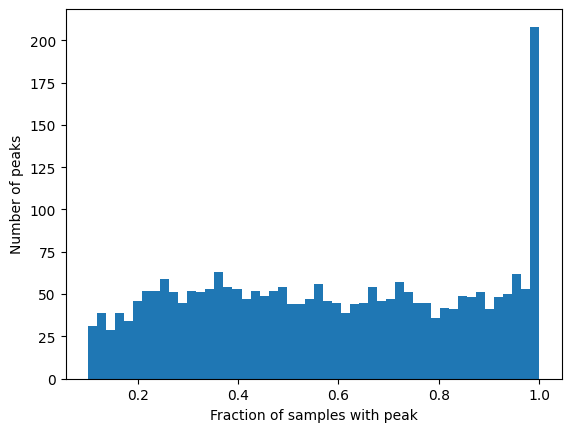

In [12]:
_ = plt.hist(freq, bins=50)
plt.xlabel('Fraction of samples with peak')
plt.ylabel('Number of peaks')

In [19]:
metadata = metadata.loc[combined_int.columns].copy()
metadata['Ref'] = metadata['Pool'].astype(int)
metadata['batch_id'] = metadata['Batch'].astype(int)


In [22]:
# Save the data to directory for normalization
combined_dir = f'{main_dir}/combined_alignment_46_grid_0'

In [17]:
# Save the data to directory for normalization
combined_dir = f'{main_dir}/combined_alignment_46_grid_0'

os.makedirs(combined_dir, exist_ok=True)
sample_info_dir = f'{combined_dir}/sample_info'
os.makedirs(sample_info_dir, exist_ok=True)
final_peaks_dir = f'{combined_dir}/final_peaks'
os.makedirs(final_peaks_dir, exist_ok=True)

combined_int.to_csv(f'{combined_dir}/final_peaks/intensity_max.csv')
combined_info.to_csv(f'{combined_dir}/final_peaks/peak_info.csv')
metadata.to_csv(f'{combined_dir}/sample_info/sample_info.csv')

In [21]:
combined_dir

'/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer/combined_alignment_46_grid_0'

## run normalizaton on the command line

```
python3 normalization_wrapper.py '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer/combined_alignment_46_grid_0' 'synthetic_norm'

python3 normalization_wrapper.py '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer/combined_alignment_46_grid_0' 'pool'
```

In [27]:
np.sum(combined_info['freq'] > 0.6)

1216

## Plot PCA of the data

In [38]:
min_freq = 0.6


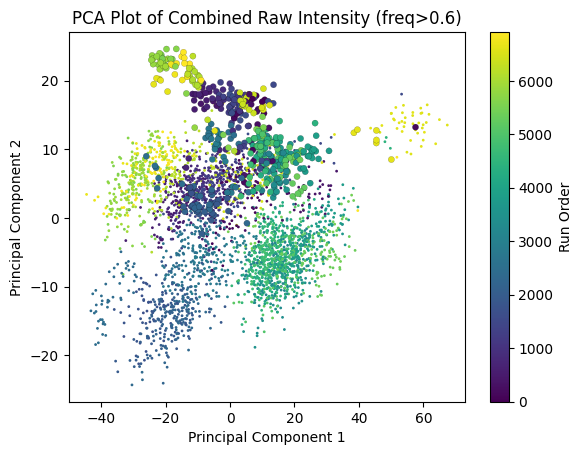

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

combined_int = pd.read_csv(f'{combined_dir}/final_peaks/intensity_max.csv', index_col=0)

# Apply log2 transformation
combined_int_log2 = np.log2(combined_int).T
# combined_int_log2  = combined_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()].copy()
combined_int_log2 = combined_int_log2[combined_info[combined_info['freq'] > 0.2].index.tolist()].copy()
# Apply standard scaler transformation
scaler = StandardScaler()
combined_int_scaled = scaler.fit_transform(combined_int_log2)
combined_int_scaled = pd.DataFrame(combined_int_scaled, index=combined_int_log2.index, columns=combined_int_log2.columns)

# Perform PCA
pca = PCA(n_components=2)
combined_int_scaled.fillna(0, inplace=True)
pca_result = pca.fit_transform(combined_int_scaled)
run_order = metadata.loc[combined_int_scaled.index,'run_order'].values
ref_samples = metadata.loc[combined_int_scaled.index,'Ref'].values
color_norm = plt.Normalize(vmin=0, vmax=metadata['run_order'].max())

# Create PCA plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=run_order, cmap='viridis', s=1, norm=color_norm)

plt.scatter(pca_result[:, 0][ref_samples.astype(bool)], 
            pca_result[:, 1][ref_samples.astype(bool)], 
            c=run_order[ref_samples.astype(bool)], cmap='viridis', 
            s=20, norm=color_norm, edgecolors='black', linewidths=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Plot of Combined Raw Intensity (freq>{min_freq})')

# create a colorbar
cbar = plt.colorbar()
cbar.set_label('Run Order')

plt.show()

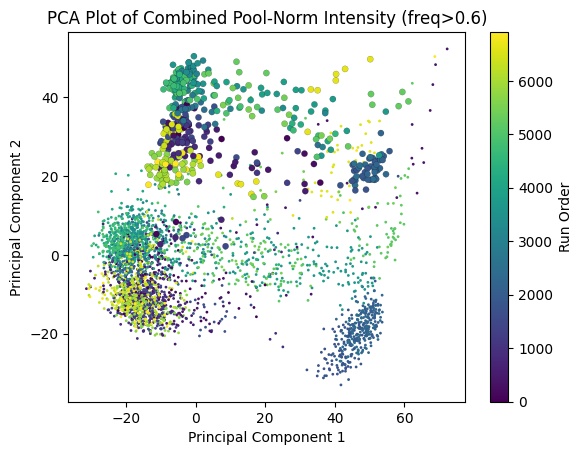

In [46]:
combined_int = pd.read_csv(f'{combined_dir}/final_peaks/intensity_max_pool.csv', index_col=0)
# Apply log2 transformation
combined_int_log2 = np.log2(combined_int).T
# combined_int_log2  = combined_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()].copy()
combined_int_log2 = combined_int_log2[combined_info[combined_info['freq'] > min_freq].index.tolist()].copy()
# Apply standard scaler transformation
scaler = StandardScaler()
combined_int_scaled = scaler.fit_transform(combined_int_log2)
combined_int_scaled = pd.DataFrame(combined_int_scaled, index=combined_int_log2.index, columns=combined_int_log2.columns)

# Perform PCA
pca = PCA(n_components=2)
combined_int_scaled.fillna(0, inplace=True)
# combined_int_scaled.fillna(combined_int_scaled.min(), inplace=True)

pca_result = pca.fit_transform(combined_int_scaled)
run_order = metadata.loc[combined_int_scaled.index,'run_order'].values
ref_samples = metadata.loc[combined_int_scaled.index,'Ref'].values
color_norm = plt.Normalize(vmin=0, vmax=metadata['run_order'].max())

# Create PCA plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=run_order, cmap='viridis', s=1, norm=color_norm)

plt.scatter(pca_result[:, 0][ref_samples.astype(bool)], 
            pca_result[:, 1][ref_samples.astype(bool)], 
            c=run_order[ref_samples.astype(bool)], cmap='viridis', 
            s=20, norm=color_norm, edgecolors='black', linewidths=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Plot of Combined Pool-Norm Intensity (freq>{min_freq})')

# create a colorbar
cbar = plt.colorbar()
cbar.set_label('Run Order')

plt.show()

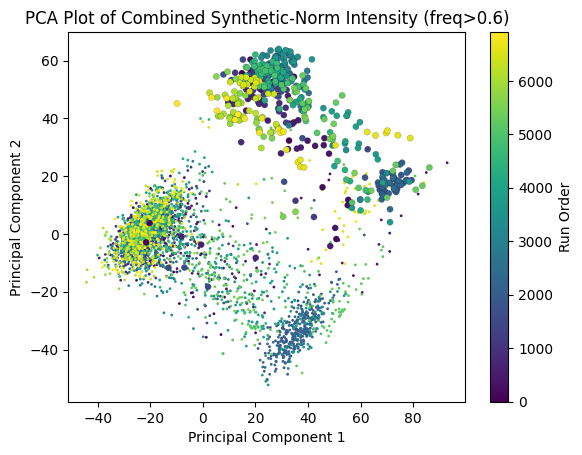

In [45]:

combined_int = pd.read_csv(f'{combined_dir}/final_peaks/intensity_max_synthetic_norm.csv', index_col=0)
# Apply log2 transformation
combined_int_log2 = np.log2(combined_int).T
# combined_int_log2  = combined_int_log2.loc[metadata[metadata['Ref']==1].index.tolist()].copy()
combined_int_log2 = combined_int_log2[combined_info[combined_info['freq'] > min_freq].index.tolist()].copy()
# Apply standard scaler transformation
scaler = StandardScaler()
combined_int_scaled = scaler.fit_transform(combined_int_log2)
combined_int_scaled = pd.DataFrame(combined_int_scaled, index=combined_int_log2.index, columns=combined_int_log2.columns)

# Perform PCA
pca = PCA(n_components=2)
# combined_int_scaled.fillna(0, inplace=True)
combined_int_scaled.fillna(combined_int_scaled.min(), inplace=True)

pca_result = pca.fit_transform(combined_int_scaled)
run_order = metadata.loc[combined_int_scaled.index,'run_order'].values
ref_samples = metadata.loc[combined_int_scaled.index,'Ref'].values
color_norm = plt.Normalize(vmin=0, vmax=metadata['run_order'].max())

# Create PCA plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=run_order, cmap='viridis', s=1, norm=color_norm)

plt.scatter(pca_result[:, 0][ref_samples.astype(bool)], 
            pca_result[:, 1][ref_samples.astype(bool)], 
            c=run_order[ref_samples.astype(bool)], cmap='viridis', 
            s=20, norm=color_norm, edgecolors='black', linewidths=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Plot of Combined Synthetic-Norm Intensity (freq>{min_freq})')

# create a colorbar
cbar = plt.colorbar()
cbar.set_label('Run Order')

plt.show()